<a href="https://colab.research.google.com/github/ayushranjan6456/HydrogenPrediction/blob/main/Hydrogen_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/gdrive/My Drive/dataset/interpolated_merged.csv')

#Drop the unnamed column with index of all 7 cycles individually
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df= df[df['Gas'] != 0]

df

,time,pH,VFA,COD,Gas
1,0.241206,5.998204,3.310584,11.227403,0.179567
2,0.482412,5.996256,3.311476,11.251849,0.366206
3,0.723618,5.994160,3.312668,11.273404,0.559677
4,0.964824,5.991923,3.314152,11.292135,0.759741
5,1.206030,5.989551,3.315920,11.308109,0.966157
...,...,...,...,...,...
1395,47.035176,4.947926,4.731427,6.214625,44.151661
1396,47.276382,4.936978,4.742158,6.144786,44.818456
1397,47.517588,4.925355,4.753809,6.072439,45.514966
1398,47.758794,4.913037,4.766412,5.997529,46.241908


In [30]:

# f = plt.figure()
# f.set_figwidth(27)
# f.set_figheight(18)
# x1=df['time']
# x2=df['pH']
# x3=df['VFA']
# x4=df['COD']
# y=df['Gas']

# plt.subplot(2, 2, 1)
# plt.scatter(x1, y, c='blue', s=70, alpha=0.5)
# plt.title("Gas vs Time")

# plt.subplot(2, 2, 2)
# plt.scatter(x2, y, c='green', s=70, alpha=0.5)
# plt.title("Gas vs pH")

# plt.subplot(2, 2, 3)
# plt.scatter(x3, y, s=70, alpha=0.5)
# plt.title("Gas vs VFA")

# plt.subplot(2, 2, 4)
# plt.scatter(x4, y, c='red', s=70, alpha=0.5)
# plt.title("Gas vs COD")

In [31]:
#Correlation matrix

corr = df.corr()
corr.style.background_gradient(cmap='RdYlBu')

,time,pH,VFA,COD,Gas
time,1.000000,-0.941326,0.960240,-0.990564,0.993265
pH,-0.941326,1.000000,-0.982841,0.942201,-0.955536
VFA,0.960240,-0.982841,1.000000,-0.962853,0.971902
COD,-0.990564,0.942201,-0.962853,1.000000,-0.993052
Gas,0.993265,-0.955536,0.971902,-0.993052,1.000000


# Splitting the dataset into training and testing

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

TargetVariable=['Gas']
Predictors=['time', 'pH', 'VFA', 'COD']

#input
x=df[Predictors].values

#output
y=df[TargetVariable].values

# Now, it is very important to perform feature scaling here because pH, time, COD, VFA values lie in different ranges. 
# If we don’t scale the features then the some features will dominate the other when the model finds the nearest neighbor to a data point in the data space. 

PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

PredictorScalerFit=PredictorScaler.fit(x)
TargetVarScalerFit=TargetVarScaler.fit(y)

x=PredictorScalerFit.transform(x)
y=TargetVarScalerFit.transform(y)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
print (X_train[0:10, :])



[[-0.80075722  0.82066338 -0.92654927  0.67917593]
 [-0.53964073  0.75212834 -0.39954933  0.29298228]
 [ 0.22630095 -0.03854097  0.07425258 -0.14092675]
 [-0.43519414  0.80049425 -0.6880869   0.27814523]
 [ 0.01740777  0.46620365 -0.343164   -0.10727362]
 [ 1.68855326 -1.2674743   1.24610582 -1.6792968 ]
 [ 0.24370872 -0.0041073   0.09320672 -0.18867072]
 [-0.52223297  0.80225895 -0.7232944   0.33330199]
 [-0.99224264  0.92291766 -1.05412649  1.03656831]
 [-0.85298051  0.83818017 -0.96629863  0.77126556]]


# Train the ML model (Linear Regression)

In [33]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LinearRegression()
  
# train the model using the training sets
reg.fit(X_train, y_train)
# regression coefficients
print('Coefficients: ', reg.coef_)

y_pred = reg.predict(X_test)
  
# variance score: 1 means perfect prediction
print('\nVariance score: {}\n'.format(reg.score(X_test, y_test)))

from sklearn import metrics

print('Mean Absolute error: {}\n'.format(metrics.mean_absolute_error(y_test,y_pred)))
print('Mean Squared error: {}\n'.format(metrics.mean_squared_error(y_test,y_pred)))
print('Root Mean Squared error: {}\n'.format(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))



Coefficients:  [[ 0.45587101 -0.06560422  0.11186666 -0.37235167]]

Variance score: 0.9926909474251275

Mean Absolute error: 0.06583812614427367

Mean Squared error: 0.007389970523939351

Root Mean Squared error: 0.08596493775917802



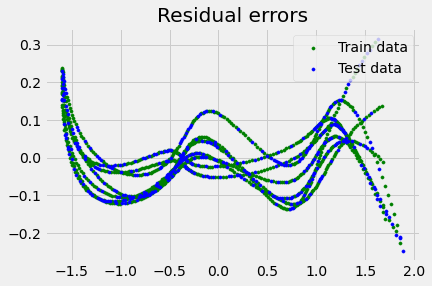

In [34]:
## plotting residual errors in training data
# A residual is a measure of how far away a point is vertically from the regression line. 
# Simply, it is the error between a predicted value and the observed actual value.

plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
# plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

In [35]:
y_pred = reg.predict(X_test)
# Scaling the predicted Gas data back to original gas scale
y_pred=TargetVarScalerFit.inverse_transform(y_pred)

# Scaling the y_test Gas data back to original gas scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Gas']=y_test_orig
TestingData['PredictedGas']=y_pred
APE=100*(abs(TestingData['Gas']-TestingData['PredictedGas'])/TestingData['Gas'])
TestingData['APE']=APE

print('The Accuracy of Linear Regression model is:', 100 - np.mean(APE))

TestingData.head()

The Accuracy of Linear Regression model is: 82.11686157402642


,time,pH,VFA,COD,Gas,PredictedGas,APE
0,17.608040,5.851850,3.695590,9.514398,17.032304,16.453477,3.398407
1,31.839196,5.276725,4.440796,8.197461,30.717726,29.426954,4.202042
2,9.165829,5.874349,3.701708,10.689150,9.778813,9.532467,2.519182
3,10.854271,5.875604,3.558297,10.462941,11.844910,10.484223,11.487528
4,34.251256,5.238920,4.517191,8.035450,32.777104,31.167298,4.911373


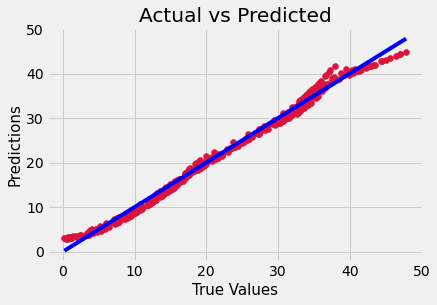

In [36]:

plt.scatter(y_test_orig, y_pred, c='crimson')

p1 = max(max(y_pred), max(y_test_orig))
p2 = min(min(y_pred), min(y_test_orig))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Actual vs Predicted')

plt.show()

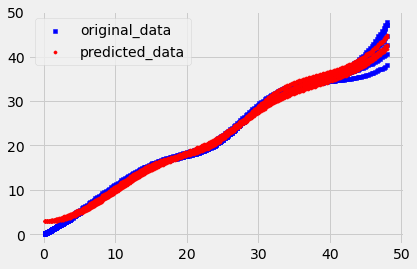

In [37]:
FullPredictions=reg.predict(x)

# Scaling the predicted Gas data back to original gas scale
FullPredictions=TargetVarScalerFit.inverse_transform(FullPredictions)

x_plot=df['time']
y1_plot =df['Gas']
y2_plot = FullPredictions

# print(x_plot.size, y1_plot.size, y2_plot.size)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y1_plot, s=10, c='b', marker="s", label='original_data')
ax1.scatter(x_plot, y2_plot, s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')
plt.show()


# Training the ML Model (Random Forest)

In [38]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
#n_estimator -> specifies the number of trees in the forest of the model., 
#random_state -> controls the randomness of the bootstrapping of the samples used when building trees.

scores = []
for k in range(15, 255):
  regressor = RandomForestRegressor(n_estimators = k, random_state = 6)

  regressor.fit(X_train, y_train.ravel())
  predictions = regressor.predict(X_test)

  predictions=TargetVarScalerFit.inverse_transform(predictions.reshape(-1,1))
  # Scaling the y_test Gas data back to original gas scale
  y_test_orig=TargetVarScalerFit.inverse_transform(y_test)
  # Scaling the test data back to original scale
  APE=100*(abs(y_test_orig-predictions)/y_test_orig)
  accuracy = 100 - np.mean(APE)
  
  print(k, '->', accuracy)
  scores.append(round(accuracy, 2))


15 -> 98.31880341937556
16 -> 98.2989909307001
17 -> 98.29556845269843
18 -> 98.30996413288187
19 -> 98.30775773723754
20 -> 98.31963031599633
21 -> 98.3225230957517
22 -> 98.3356798306765
23 -> 98.34006927126686
24 -> 98.32917272830753
25 -> 98.32701843006416
26 -> 98.31025128402482
27 -> 98.31071221528033
28 -> 98.3139848365397
29 -> 98.32209782807475
30 -> 98.31569008533333
31 -> 98.31870787909313
32 -> 98.32303747370261
33 -> 98.32724247278092
34 -> 98.32704318925283
35 -> 98.32743271887276
36 -> 98.34225965250559
37 -> 98.352572445363
38 -> 98.3606700377918
39 -> 98.3612707478317
40 -> 98.35862834585438
41 -> 98.35660159361585
42 -> 98.35780333410068
43 -> 98.3551079601935
44 -> 98.36396940532144
45 -> 98.3611761774977
46 -> 98.36007742586365
47 -> 98.36180043208148
48 -> 98.36321232475942
49 -> 98.36226527164874
50 -> 98.36375669161872
51 -> 98.3658171948218
52 -> 98.36787142070133
53 -> 98.36711499349619
54 -> 98.36909030499626
55 -> 98.36351635339251
56 -> 98.36634157420411
57 

RandomForestRegressor(n_estimators=85, random_state=6)

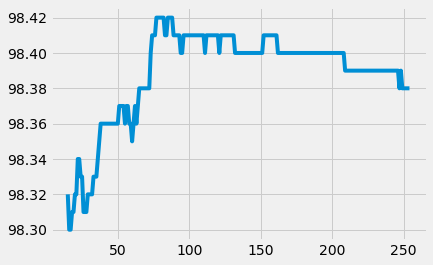

In [45]:
plt.plot(range(15, 255), scores)

regressor = RandomForestRegressor(n_estimators = 85, random_state = 6)
regressor.fit(X_train, y_train.ravel())

In [40]:
# Use the forest's predict method on the test data
# predictions = regressor.predict(X_test)

# # Calculate mean absolute error (mae)
# errors = abs(predictions - y_test)
# print('Mean Absolute Error:', round(np.mean(errors), 2))

# # Calculate mean absolute percentage error (MAPE)
# mape = 100 * (errors / y_test)

# # Calculate accuracy
# accuracy = 100 - np.mean(mape)
# print('\nAccuracy:', round(accuracy, 2), '%.')


In [46]:
predictions = regressor.predict(X_test)
# Scaling the predicted Gas data back to original gas scale
predictions=TargetVarScalerFit.inverse_transform(predictions.reshape(-1,1))

# Scaling the y_test Gas data back to original gas scale
y_test_orig=TargetVarScalerFit.inverse_transform(y_test)

# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Gas']=y_test_orig
TestingData['PredictedGas']=predictions
APE=100*(abs(TestingData['Gas']-TestingData['PredictedGas'])/TestingData['Gas'])
TestingData['APE']=APE

print('The Accuracy of ANN model is:', 100 - np.mean(APE))

TestingData.head()

The Accuracy of ANN model is: 98.41642478370618


,time,pH,VFA,COD,Gas,PredictedGas,APE
0,17.608040,5.851850,3.695590,9.514398,17.032304,16.925155,0.629090
1,31.839196,5.276725,4.440796,8.197461,30.717726,30.696439,0.069297
2,9.165829,5.874349,3.701708,10.689150,9.778813,9.911254,1.354361
3,10.854271,5.875604,3.558297,10.462941,11.844910,11.671581,1.463321
4,34.251256,5.238920,4.517191,8.035450,32.777104,32.821865,0.136561


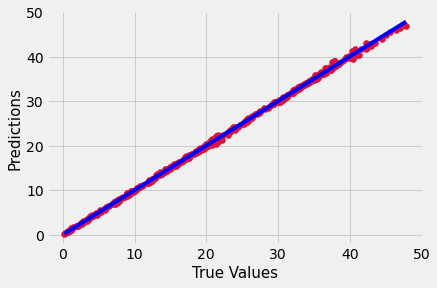

In [47]:

plt.scatter(y_test_orig, predictions, c='crimson')

p1 = max(max(predictions), max(y_test_orig))
p2 = min(min(predictions), min(y_test_orig))

plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)

plt.show()

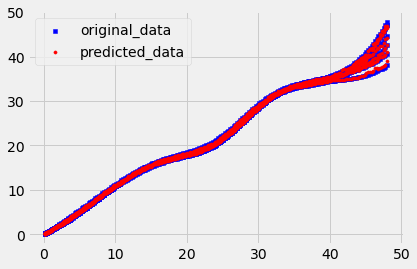

In [48]:
FullPredictions=regressor.predict(x)

# Scaling the predicted Gas data back to original gas scale
FullPredictions=TargetVarScalerFit.inverse_transform(FullPredictions.reshape(-1,1))

x_plot=df['time']
y1_plot =df['Gas']
y2_plot = FullPredictions

# print(x_plot.size, y1_plot.size, y2_plot.size)

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_plot, y1_plot, s=10, c='b', marker="s", label='original_data')
ax1.scatter(x_plot, y2_plot, s=10, c='r', marker="o", label='predicted_data')
plt.legend(loc='upper left')
plt.show()


#Hyperparamter Tuning

In [44]:
1/0
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

ZeroDivisionError: ignored

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f}.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.\n'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 15, random_state = 21)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
